In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import functions from src/Cyclic_volt.py
from src.Cyclic_volt import activation, inhibition, cyclic_voltammogram, plot_cyclic_voltammogram, compute_interaction, plot_acti_inhi, plot_interpolated_CV, drug

# Reproduce figures from paper 3


Reference: M. Vacalebre, "Simulated enzymatic kinetics in drugs detection," Master's Degree Thesis, Biomedical Engineering, Politecnico di Torino, Italy, Mar. 2020. Supervisors: D. Demarchi, S. Carrara, and S. Aiassa.


<table>
  <tr>
    <td> <img src="./images/pap3image2.png" alt="Image1" style="width: 700px;"/> </td>
    <td> <img src="./images/pap3image1.png" alt="Image2" style="width: 700px;"/> </td>
  </tr>
</table>


In [2]:
def detect_interaction_type(activation, inhibition, drug_dict, drug2, range_around_peak=100):
    peak_position_drug2 = drug_dict[drug2]["Peak_pos"]
    range_min = max(0, peak_position_drug2 - range_around_peak)
    range_max = min(len(activation[0]), peak_position_drug2 + range_around_peak)

    peak_activation = np.max([np.max(act[range_min:range_max]) for act in activation])
    peak_inhibition = np.max([np.max(inh[range_min:range_max]) for inh in inhibition])

    if peak_activation < peak_inhibition:
        return 0  # activation case
    else:
        return 1  # inhibition case

### NP (variable) vs. FLUR (fixed)

1


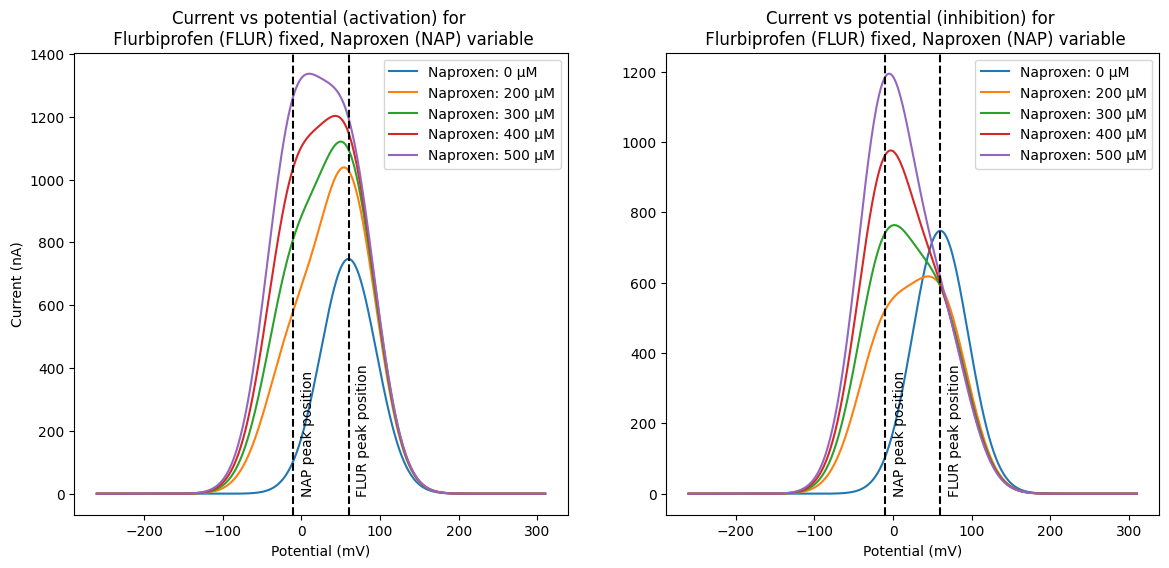

In [4]:
drug1 = "NAP"
drug2 = "FLUR"

concentrations = [0, 200, 300, 400, 500]  # Concentrations for drug1
fixed_concentration = 200  # Fixed concentration for drug2

# Compute currents for activation and inhibition cases
currents_activation, potential = compute_interaction(drug1, drug2, concentrations, activation, fixed_concentration=fixed_concentration, peak_amplitude=[1.6, 1.45], adaptative_potential=True)
currents_inhibition, potential = compute_interaction(drug1, drug2, concentrations, inhibition, fixed_concentration=fixed_concentration, peak_amplitude=[1.6, 1.45], adaptative_potential=True)

# Plot the results
plot_acti_inhi(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    activation=currents_activation,
    inhibition=currents_inhibition,
    potential=potential,
)

### Associated cyclic voltammogram

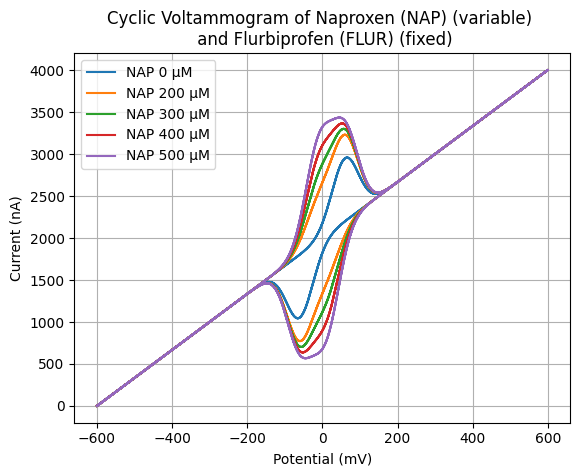

In [5]:
# Gaussian peak parameters
potential_range = np.linspace(
    -600, 600, 1200
)  # Potential range in mV  # Potential range in mV

plot_interpolated_CV(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    currents=currents_activation,
    potential_range=potential_range,
    potential=potential,
    cyclic_voltammogram_func=cyclic_voltammogram,
)

### DX (variable) vs. CP (fixed)

1


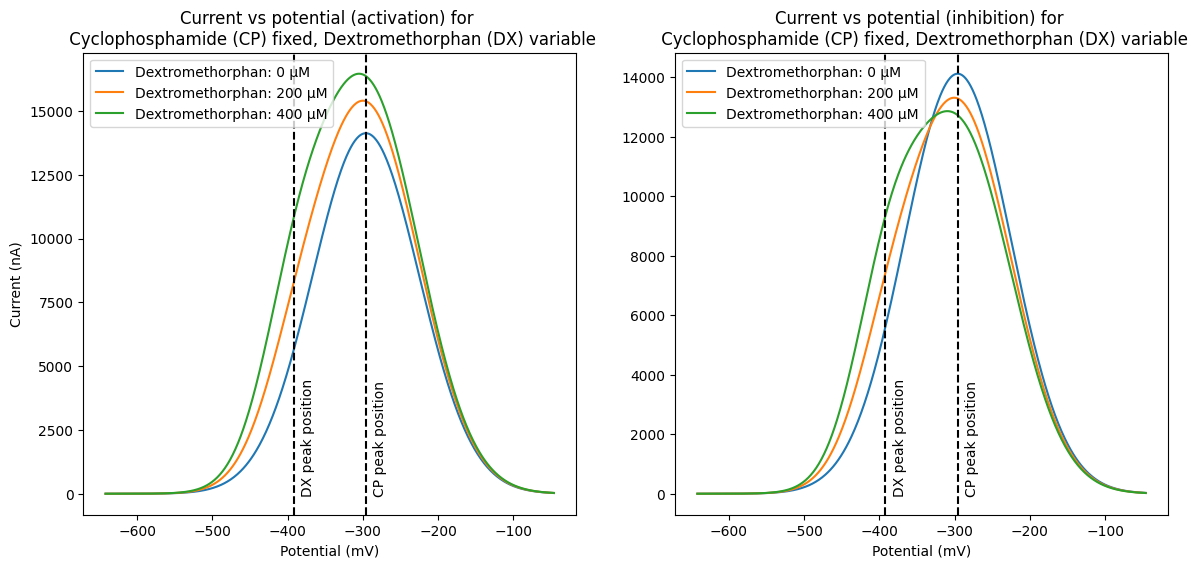

In [6]:
drug1 = "DX"
drug2 = "CP"

concentrations = [0, 200, 400]
fixed_concentration = 400

# Compute currents for activation and inhibition cases
currents_activation, potential = compute_interaction(drug1, drug2, concentrations, activation, fixed_concentration=fixed_concentration, peak_amplitude=[0.3, 10], adaptative_potential=True)
currents_inhibition, potential = compute_interaction(drug1, drug2, concentrations, inhibition, fixed_concentration=fixed_concentration, peak_amplitude=[0.3, 10], adaptative_potential=True)

# Plot the results
plot_acti_inhi(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    activation=currents_activation,
    inhibition=currents_inhibition,
    potential=potential,
)
# add current (nA) to the y axis on right graph



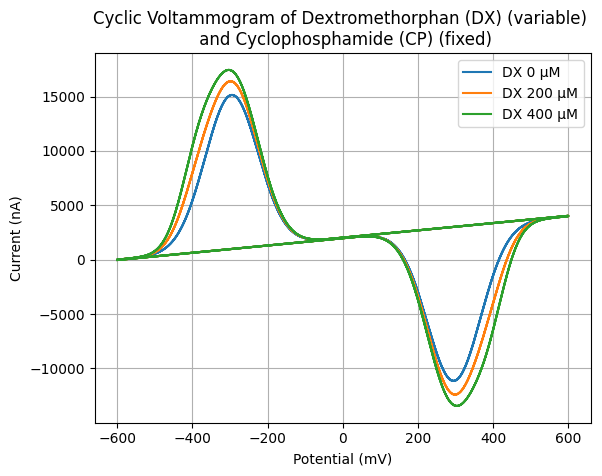

In [7]:
# Gaussian peak parameters
potential_range = np.linspace(-600, 600, 1200)  # Potential range in mV

plot_interpolated_CV(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    currents=currents_activation,
    potential_range=potential_range,
    potential=potential,
    cyclic_voltammogram_func=cyclic_voltammogram,
)

# SHOW EXAMPLES WITH OUR DRUGS

## CP (variable) vs. IFOS (fixed)

1


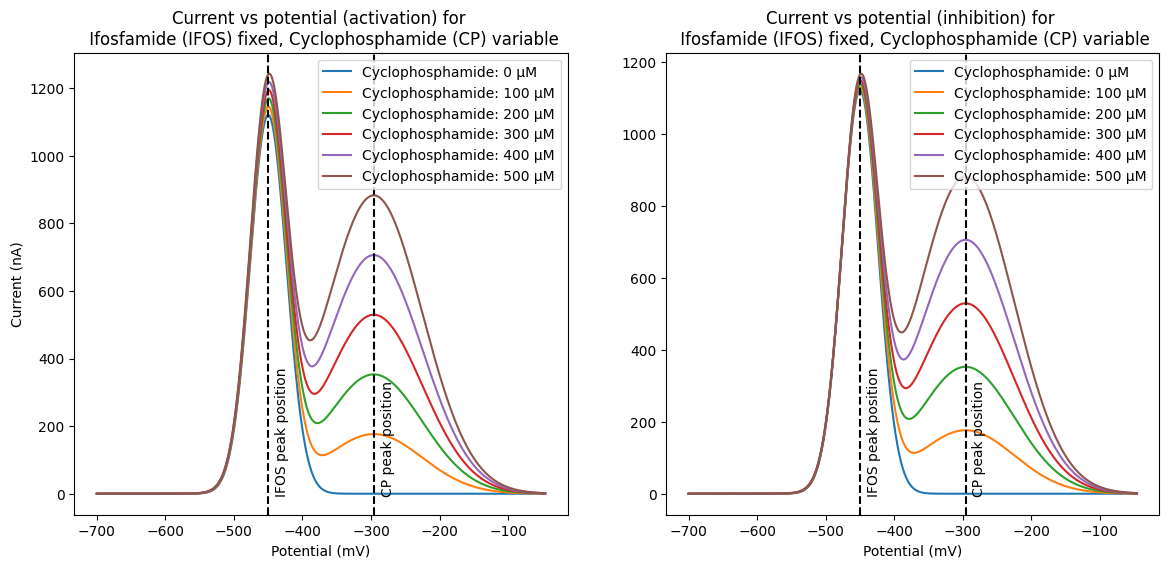

In [8]:
drug1 = "CP"
drug2 = "IFOS"

concentrations = [0, 100, 200, 300, 400, 500]
fixed_concentration = 500

# Compute currents for activation and inhibition cases
currents_activation, potential = compute_interaction(
    drug1,
    drug2,
    concentrations,
    activation,
    fixed_concentration=fixed_concentration,
    peak_amplitude=[0.5, 1],
    adaptative_potential=True,
)
currents_inhibition, potential = compute_interaction(
    drug1,
    drug2,
    concentrations,
    inhibition,
    fixed_concentration=fixed_concentration,
    peak_amplitude=[0.5, 1],
    adaptative_potential=True,
)

# Plot the results
plot_acti_inhi(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    activation=currents_activation,
    inhibition=currents_inhibition,
    potential=potential,
)

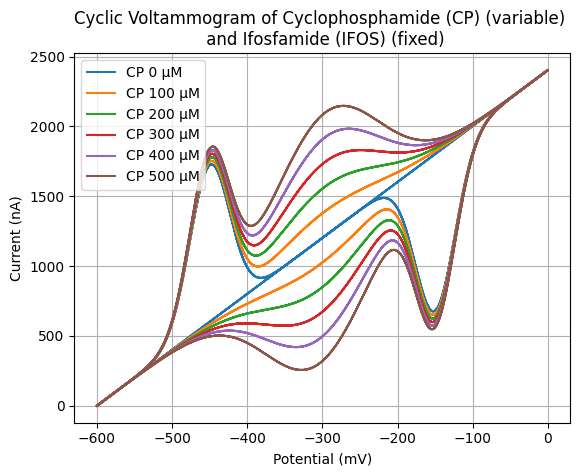

In [9]:
potential_range = np.linspace(-600, 0, 1000)  # Potential range in mV
plot_interpolated_CV(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    currents=currents_activation,
    potential_range=potential_range,
    potential=potential,
    cyclic_voltammogram_func=cyclic_voltammogram,
)

## IFOS (variable) vs. CP (fixed)

1


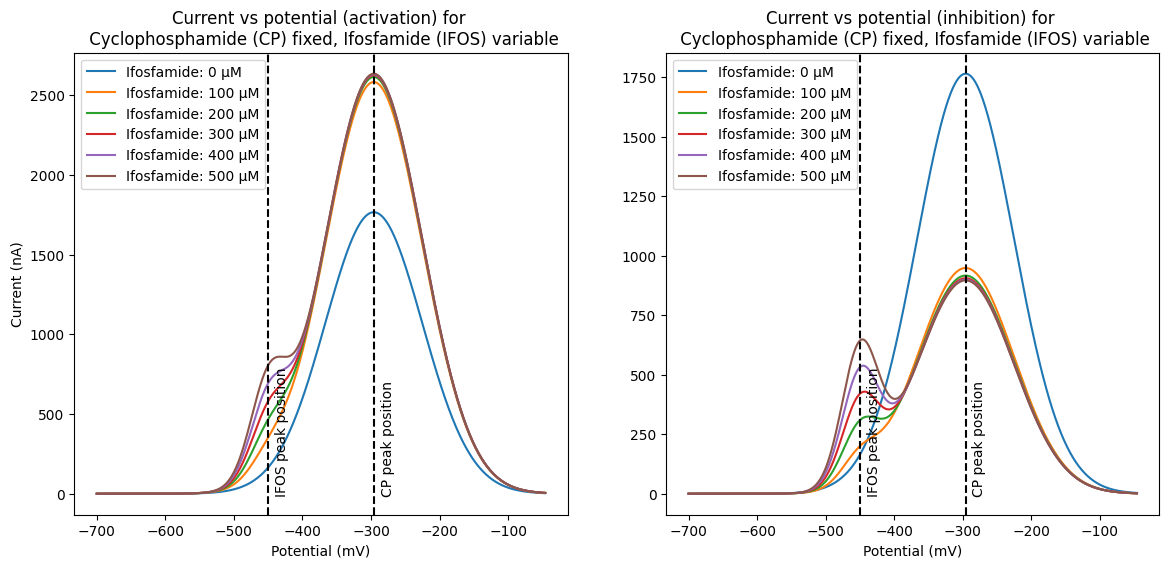

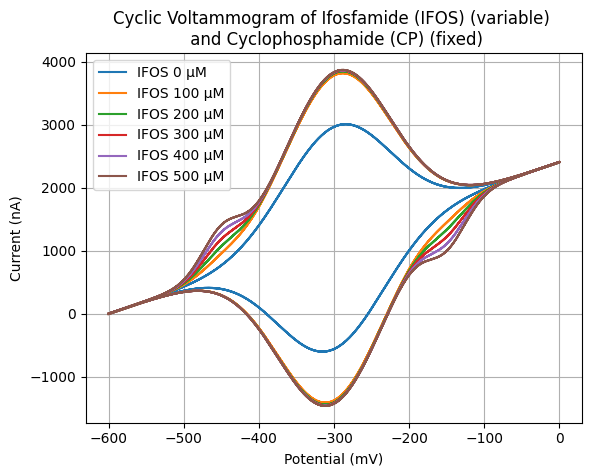

In [10]:
drug1 = "IFOS"
drug2 = "CP"

concentrations = [0, 100, 200, 300, 400, 500]
fixed_concentration = 500

# Compute currents for activation and inhibition cases
currents_activation, potential = compute_interaction(drug1, drug2, concentrations, activation, fixed_concentration=fixed_concentration, peak_amplitude=[0.5, 1], adaptative_potential=True, THRESHOLD_POTENTIAL=250)
currents_inhibition, potential = compute_interaction(drug1, drug2, concentrations, inhibition, fixed_concentration=fixed_concentration, peak_amplitude=[0.5, 1], adaptative_potential=True, THRESHOLD_POTENTIAL=250)

# Plot the results
plot_acti_inhi(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    activation=currents_activation,
    inhibition=currents_inhibition,
    potential=potential,
)

potential_range = np.linspace(-600, 0, 1000)  # Potential range in mV
plot_interpolated_CV(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    currents=currents_activation,
    potential_range=potential_range,
    potential=potential,
    cyclic_voltammogram_func=cyclic_voltammogram,
)

## ETOP (variable) vs. CP (fixed)

1


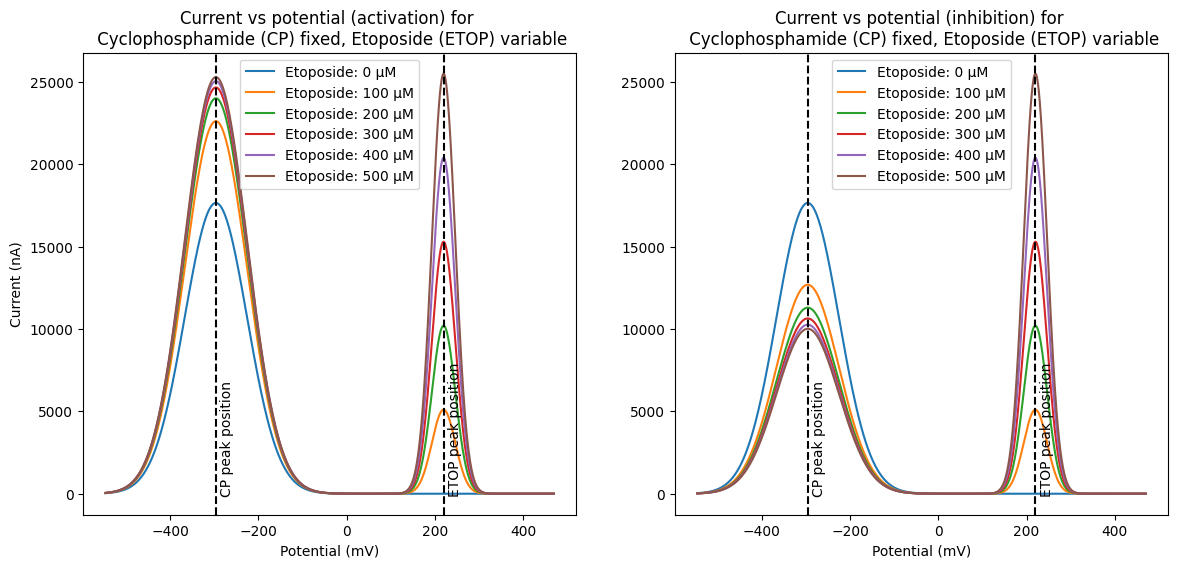

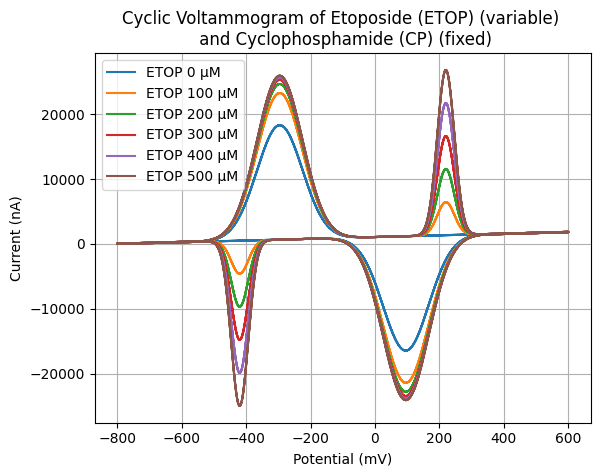

In [11]:
drug1 = "ETOP"
drug2 = "CP"

concentrations = [0, 100, 200, 300, 400, 500]
fixed_concentration = 500

# Compute currents for activation and inhibition cases
currents_activation, potential = compute_interaction(drug1, drug2, concentrations, activation, fixed_concentration=fixed_concentration, peak_amplitude=[1, 10], adaptative_potential=True, THRESHOLD_POTENTIAL=250)
currents_inhibition, potential = compute_interaction(drug1, drug2, concentrations, inhibition, fixed_concentration=fixed_concentration, peak_amplitude=[1, 10], adaptative_potential=True, THRESHOLD_POTENTIAL=250)


# Plot the results
plot_acti_inhi(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    activation=currents_activation,
    inhibition=currents_inhibition,
    potential=potential,
)

potential_range = np.linspace(-800, 600, 3000)  # Potential range in mV
plot_interpolated_CV(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    currents=currents_activation,
    potential_range=potential_range,
    potential=potential,
    cyclic_voltammogram_func=cyclic_voltammogram,
)

## CP (variable) vs. ETOP (fixed)

1


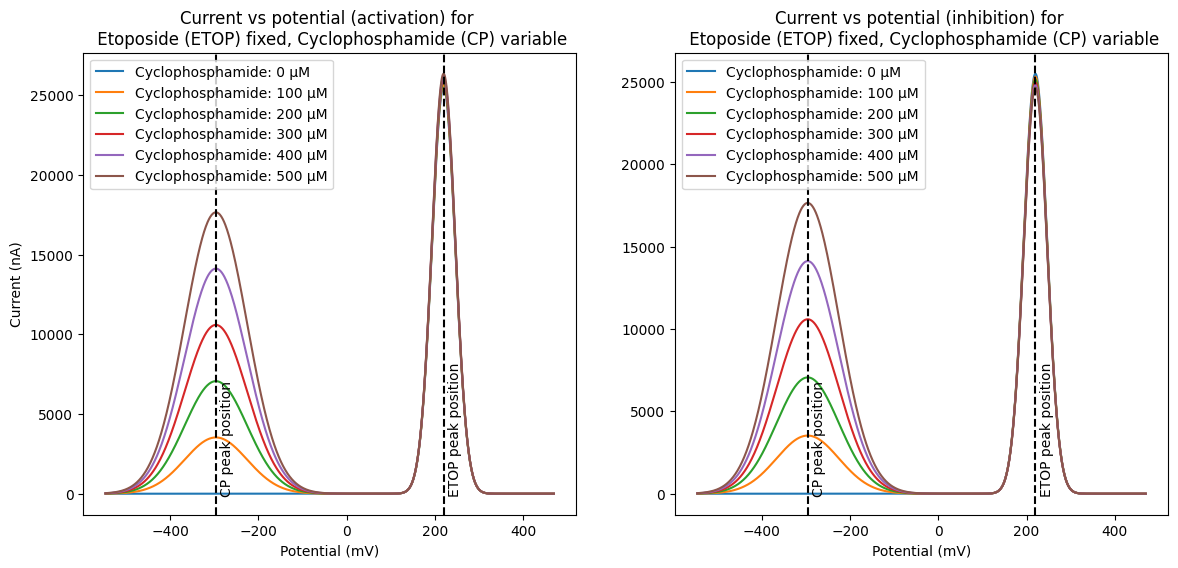

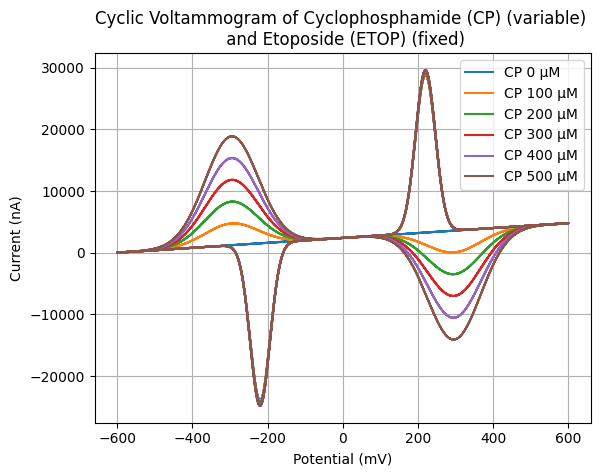

In [12]:
drug1 = "CP"
drug2 = "ETOP"

concentrations = [0, 100, 200, 300, 400, 500]
fixed_concentration = 500

# Compute currents for activation and inhibition cases
currents_activation, potential = compute_interaction(drug1, drug2, concentrations, activation, fixed_concentration=fixed_concentration, peak_amplitude=[10, 1], adaptative_potential=True, THRESHOLD_POTENTIAL=250)
currents_inhibition, potential = compute_interaction(drug1, drug2, concentrations, inhibition, fixed_concentration=fixed_concentration, peak_amplitude=[10, 1], adaptative_potential=True, THRESHOLD_POTENTIAL=250)


# Plot the results
plot_acti_inhi(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    activation=currents_activation,
    inhibition=currents_inhibition,
    potential=potential,
)

potential_range = np.linspace(-600, 600, 1000)   # Potential range in mV
plot_interpolated_CV(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    currents=currents_activation,
    potential_range=potential_range,
    potential=potential,
    cyclic_voltammogram_func=cyclic_voltammogram,
)

## IFOS (variable) vs. ETOP (fixed)

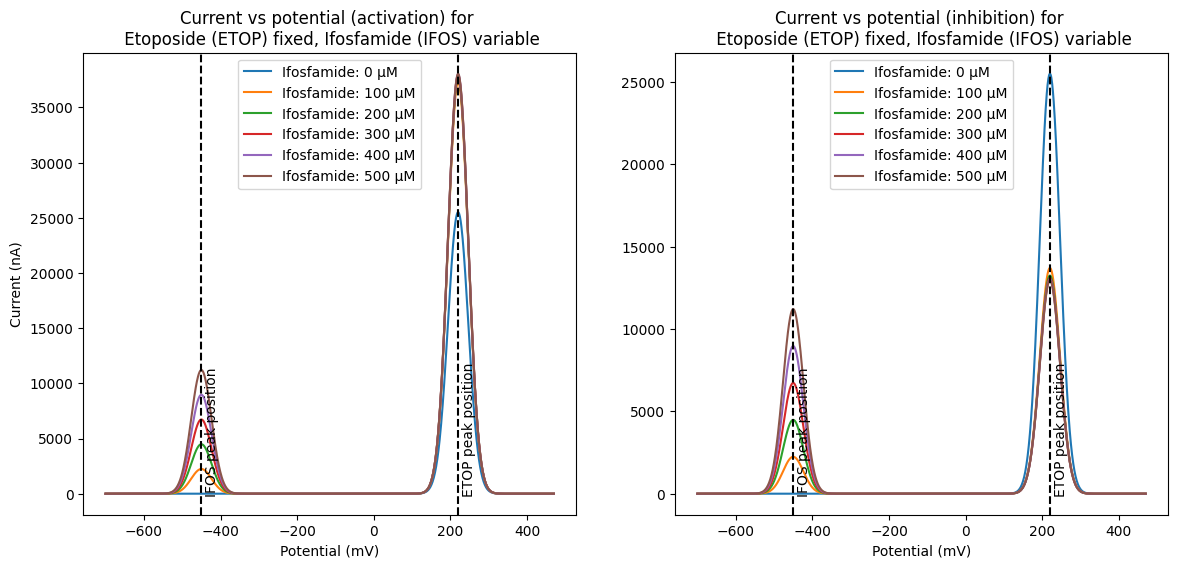

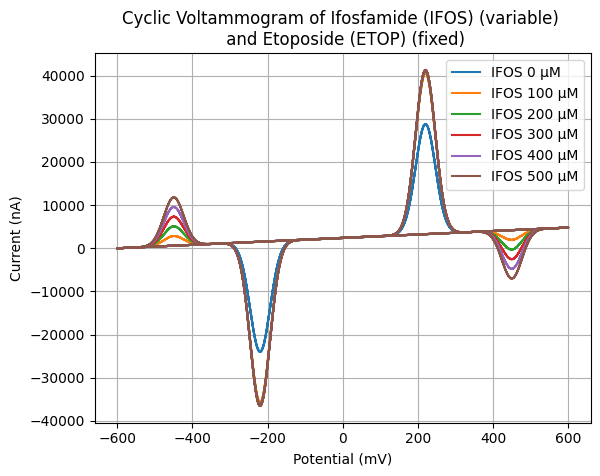

In [13]:
drug1 = "IFOS"
drug2 = "ETOP"

concentrations = [0, 100, 200, 300, 400, 500]
fixed_concentration = 500

# Compute currents for activation and inhibition cases
currents_activation, potential = compute_interaction(drug1, drug2, concentrations, activation, fixed_concentration=fixed_concentration, peak_amplitude=[10, 1], adaptative_potential=True, THRESHOLD_POTENTIAL=250)
currents_inhibition, potential = compute_interaction(drug1, drug2, concentrations, inhibition, fixed_concentration=fixed_concentration, peak_amplitude=[10, 1], adaptative_potential=True, THRESHOLD_POTENTIAL=250)

# Plot the results
plot_acti_inhi(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    activation=currents_activation,
    inhibition=currents_inhibition,
    potential=potential,
)

potential_range = np.linspace(-600, 600, 1000)   # Potential range in mV
plot_interpolated_CV(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    currents=currents_activation,
    potential_range=potential_range,
    potential=potential,
    cyclic_voltammogram_func=cyclic_voltammogram,
)

## ETOP (variable) vs. IFOS (fixed)

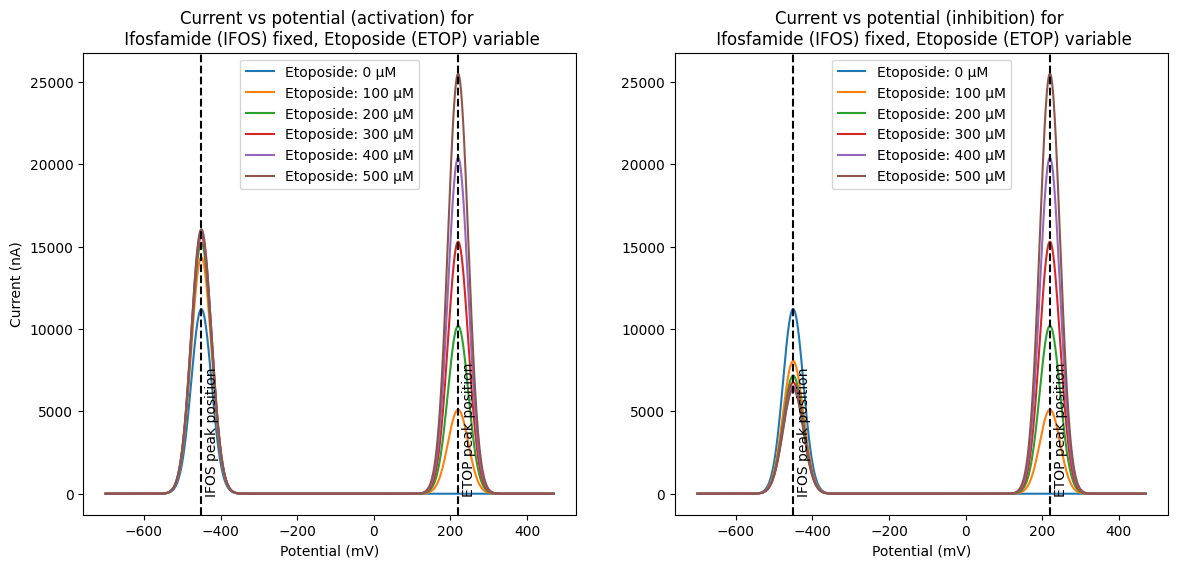

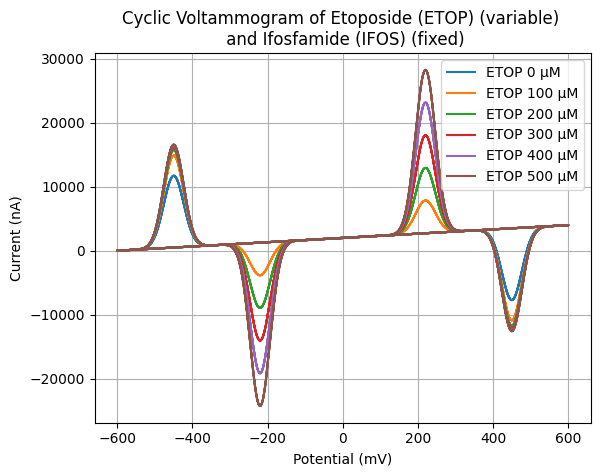

In [14]:
drug1 = "ETOP"
drug2 = "IFOS"

concentrations = [0, 100, 200, 300, 400, 500]
fixed_concentration = 500

# Compute currents for activation and inhibition cases
currents_activation, potential = compute_interaction(drug1, drug2, concentrations, activation, fixed_concentration=fixed_concentration, peak_amplitude=[1, 10], adaptative_potential=True, THRESHOLD_POTENTIAL=250)
currents_inhibition, potential = compute_interaction(drug1, drug2, concentrations, inhibition, fixed_concentration=fixed_concentration, peak_amplitude=[1, 10], adaptative_potential=True, THRESHOLD_POTENTIAL=250)

# Plot the results
plot_acti_inhi(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    activation=currents_activation,
    inhibition=currents_inhibition,
    potential=potential,
)

potential_range = np.linspace(-600, 600, 1200)   # Potential range in mV
plot_interpolated_CV(
    drug1=drug1,
    drug2=drug2,
    concentration=concentrations,
    currents=currents_activation,
    potential_range=potential_range,
    potential=potential,
    cyclic_voltammogram_func=cyclic_voltammogram,
)